In [95]:
import os
import pandas as pd

# Pfad zum Hauptordner
root_directory = '/Users/olivialawinski/IKT/analytics/Semesterabgabe/raw_data/'

# Initialisieren des DataFrames
df = pd.DataFrame(columns=["EPOCH_TIME", "DEVICE_NAME", "SENSOR_TYPE", "MEASUREMENT_VALUE", "GPS_LAT", "GPS_LONG", "SOURCE_FOLDER"])

# Funktion zum Extrahieren der Daten
def extract_data(file_path, source_folder):
    data = []
    gps_data = {}  # Zwischenablage für GPS-Daten
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:
                parts = line.split(';')
                if len(parts) == 4:
                    epoch_time, device_name, sensor_type, measurement_value = parts
                    if sensor_type == "AB":
                        gps_lat, gps_long = measurement_value.split(',')
                        gps_data[epoch_time] = (gps_lat, gps_long)
                        # die Zeile mit GPS-Daten ebenfalls in die data-Liste einfügen
                        data.append([epoch_time, device_name, sensor_type, measurement_value, gps_lat, gps_long, source_folder])
                    else:
                        gps_lat, gps_long = gps_data.get(epoch_time, (None, None))
                        data.append([epoch_time, device_name, sensor_type, measurement_value, gps_lat, gps_long, source_folder])
    return data

# Rekursiv alle txt-Dateien durchsuchen
for subdir, _, files in os.walk(root_directory):
    for file in files:
        if file.endswith('.txt'):
            file_path = os.path.join(subdir, file)
            source_folder = os.path.relpath(subdir, root_directory)
            df = pd.concat([df, pd.DataFrame(extract_data(file_path, source_folder), columns=df.columns)], ignore_index=True)

# Speichern in CSV
output_file = '/Users/olivialawinski/IKT/analytics/Semesterabgabe/raw_data/combined_dataset_with_ab.csv'
df.to_csv(output_file, sep=';', index=False)

print(f'Daten wurden erfolgreich in {output_file} gespeichert.')


Daten wurden erfolgreich in /Users/olivialawinski/IKT/analytics/Semesterabgabe/raw_data/combined_dataset_with_ab.csv gespeichert.


In [96]:
# Hier lassen wir uns die ersten 10 Zeilen ausgeben, um einen ertsen Eindruck zubekommen
df.head(10)

,EPOCH_TIME,DEVICE_NAME,SENSOR_TYPE,MEASUREMENT_VALUE,GPS_LAT,GPS_LONG,SOURCE_FOLDER
0,#[EPOCH_TIME],[DEVICE_NAME],[SENSOR_TYPE],[MEASUREMENT_VALUE],None,None,Uneben
1,1629745991519,LOCAL_PHONE,Y,61,None,None,Uneben
2,1629745991519,LOCAL_PHONE,80,SL_0,None,None,Uneben
3,1629745991519,LOCAL_PHONE,83,RT_O,None,None,Uneben
4,1629745991519,LOCAL_PHONE,81,RS_N,None,None,Uneben
5,1629745990750,LOCAL_PHONE,11,20210823,None,None,Uneben
6,1629745990749,LOCAL_PHONE,10,211310,None,None,Uneben
7,1629745988604,LOCAL_PHONE,AB,"52.5540901,13.6349328",52.5540901,13.6349328,Uneben
8,1629745990750,LOCAL_PHONE,11,20210823,None,None,Uneben
9,1629745991559,LOCAL_PHONE,20,"-0.99,0.09,1.04",None,None,Uneben


In [97]:
df.dtypes

EPOCH_TIME           object
DEVICE_NAME          object
SENSOR_TYPE          object
MEASUREMENT_VALUE    object
GPS_LAT              object
GPS_LONG             object
SOURCE_FOLDER        object
dtype: object

In [98]:
# Statistische Zusammenfassung
df.describe()

,EPOCH_TIME,DEVICE_NAME,SENSOR_TYPE,MEASUREMENT_VALUE,GPS_LAT,GPS_LONG,SOURCE_FOLDER
count,1172226,1172226,1172226,1172226,4313,4313,1172226
unique,530573,2,10,481420,1808,1811,12
top,#[EPOCH_TIME],LOCAL_PHONE,20,20210817,52.5287633,13.5620953,Glatt
freq,320,1171906,1135669,4300,8,6,238114


In [99]:
# Informationen über die Datentypen und Nullwerte
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172226 entries, 0 to 1172225
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   EPOCH_TIME         1172226 non-null  object
 1   DEVICE_NAME        1172226 non-null  object
 2   SENSOR_TYPE        1172226 non-null  object
 3   MEASUREMENT_VALUE  1172226 non-null  object
 4   GPS_LAT            4313 non-null     object
 5   GPS_LONG           4313 non-null     object
 6   SOURCE_FOLDER      1172226 non-null  object
dtypes: object(7)
memory usage: 62.6+ MB


In [100]:
for col in df.columns:
    print(col)
    print(df[col] .nunique())

EPOCH_TIME
530573
DEVICE_NAME
2
SENSOR_TYPE
10
MEASUREMENT_VALUE
481420
GPS_LAT
1808
GPS_LONG
1811
SOURCE_FOLDER
12


In [101]:
# Anzahl fehlender Werte pro Spalte
print(df.isnull().sum())

EPOCH_TIME                 0
DEVICE_NAME                0
SENSOR_TYPE                0
MEASUREMENT_VALUE          0
GPS_LAT              1167913
GPS_LONG             1167913
SOURCE_FOLDER              0
dtype: int64


In [102]:
# Extrahieren der z-Werte
def extract_z_value(item):
    if isinstance(item,str) and "," in item:
        item = item.split(",")
        if len(item) == 3:
            return item[2]  # Der z-Wert ist der letzte Wert
    else:
        return item

In [150]:
#neue Spalte hinzufügen und mit z-Wert von Measurment befüllen
df['z_value'] = df['MEASUREMENT_VALUE'].map(extract_z_value)

In [151]:
df.head(10)

,EPOCH_TIME,DEVICE_NAME,SENSOR_TYPE,MEASUREMENT_VALUE,GPS_LAT,GPS_LONG,SOURCE_FOLDER,z_value
0,#[EPOCH_TIME],[DEVICE_NAME],[SENSOR_TYPE],[MEASUREMENT_VALUE],None,None,Uneben,[MEASUREMENT_VALUE]
1,1629745991519,LOCAL_PHONE,Y,61,None,None,Uneben,61
2,1629745991519,LOCAL_PHONE,80,SL_0,None,None,Uneben,SL_0
3,1629745991519,LOCAL_PHONE,83,RT_O,None,None,Uneben,RT_O
4,1629745991519,LOCAL_PHONE,81,RS_N,None,None,Uneben,RS_N
5,1629745990750,LOCAL_PHONE,11,20210823,None,None,Uneben,20210823
6,1629745990749,LOCAL_PHONE,10,211310,None,None,Uneben,211310
7,1629745988604,LOCAL_PHONE,AB,"52.5540901,13.6349328",52.5540901,13.6349328,Uneben,None
8,1629745990750,LOCAL_PHONE,11,20210823,None,None,Uneben,20210823
9,1629745991559,LOCAL_PHONE,20,"-0.99,0.09,1.04",None,None,Uneben,1.04


In [108]:
print(df['DEVICE_NAME'].unique())

['[DEVICE_NAME]' 'LOCAL_PHONE']


In [115]:
# Löschen von Zeilen ( Zeile 0 löschen)
df_cleaned = df[df['DEVICE_NAME'] != '[DEVICE_NAME]']

# Überprüfen, ob die Zeilen gelöscht wurden
print("Anzahl der Zeilen nach dem Löschen von DEVICE_NAME 'Device_name':")
print(df_cleaned.shape)


Anzahl der Zeilen nach dem Löschen von DEVICE_NAME 'Device_name':
(1171906, 8)


In [117]:
df_cleaned.head()

,EPOCH_TIME,DEVICE_NAME,SENSOR_TYPE,MEASUREMENT_VALUE,GPS_LAT,GPS_LONG,SOURCE_FOLDER,z_value
1,1629745991519,LOCAL_PHONE,Y,61,None,None,Uneben,NaN
2,1629745991519,LOCAL_PHONE,80,SL_0,None,None,Uneben,NaN
3,1629745991519,LOCAL_PHONE,83,RT_O,None,None,Uneben,NaN
4,1629745991519,LOCAL_PHONE,81,RS_N,None,None,Uneben,NaN
5,1629745990750,LOCAL_PHONE,11,20210823,None,None,Uneben,NaN


In [106]:
# Filtern der Daten für 'SENSOR_TYPE' AB
df_ab = df[df['SENSOR_TYPE'] == 'AB'].copy()

# Funktionen zum Extrahieren der GPS-Koordinaten
def extract_gps_lat(item):
    if isinstance(item, str) and "," in item:
        lat, _ = item.split(",")
        return float(lat)
    return None

def extract_gps_long(item):
    if isinstance(item, str) and "," in item:
        _, long = item.split(",")
        return float(long)
    return None

# Anwenden der Funktionen auf die Spalte 'MEASUREMENT_VALUE'
df_ab['GPS_LAT'] = df_ab['MEASUREMENT_VALUE'].map(extract_gps_lat)
df_ab['GPS_LONG'] = df_ab['MEASUREMENT_VALUE'].map(extract_gps_long)

# Anzeigen der Zeilen mit extrahierten GPS-Daten
df_ab[['EPOCH_TIME', 'DEVICE_NAME', 'SENSOR_TYPE', 'GPS_LAT', 'GPS_LONG', 'SOURCE_FOLDER']]

,EPOCH_TIME,DEVICE_NAME,SENSOR_TYPE,GPS_LAT,GPS_LONG,SOURCE_FOLDER
7,1629745988604,LOCAL_PHONE,AB,52.554090,13.634933,Uneben
20,1629745991606,LOCAL_PHONE,AB,52.553826,13.635074,Uneben
332,1629745994622,LOCAL_PHONE,AB,52.553556,13.635217,Uneben
642,1629745997618,LOCAL_PHONE,AB,52.553288,13.635365,Uneben
950,1629746000613,LOCAL_PHONE,AB,52.553021,13.635500,Uneben
...,...,...,...,...,...,...
1170814,1630526611049,LOCAL_PHONE,AB,52.512922,13.482989,Glatt/neue
1171126,1630526614067,LOCAL_PHONE,AB,52.512976,13.482458,Glatt/neue
1171438,1630526617068,LOCAL_PHONE,AB,52.513019,13.481926,Glatt/neue
1171748,1630526620070,LOCAL_PHONE,AB,52.513076,13.481397,Glatt/neue


In [107]:
print(df['SENSOR_TYPE'].unique())

['[SENSOR_TYPE]' 'Y' '80' '83' '81' '11' '10' 'AB' '20' '50']


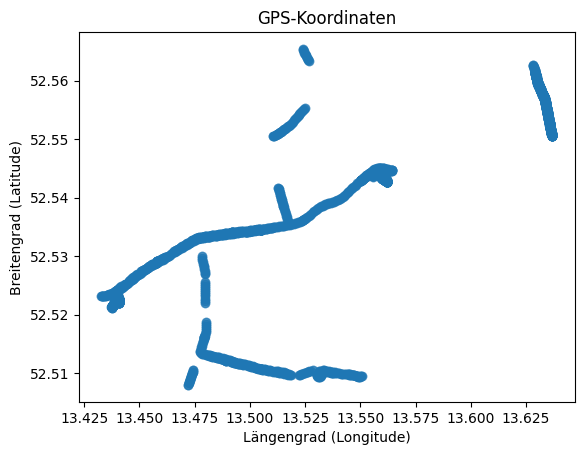

In [110]:
import matplotlib.pyplot as plt

# Plotten der GPS-Koordinaten
plt.scatter(df_ab['GPS_LONG'], df_ab['GPS_LAT'], alpha=0.5)
plt.title('GPS-Koordinaten')
plt.xlabel('Längengrad (Longitude)')
plt.ylabel('Breitengrad (Latitude)')
plt.show()

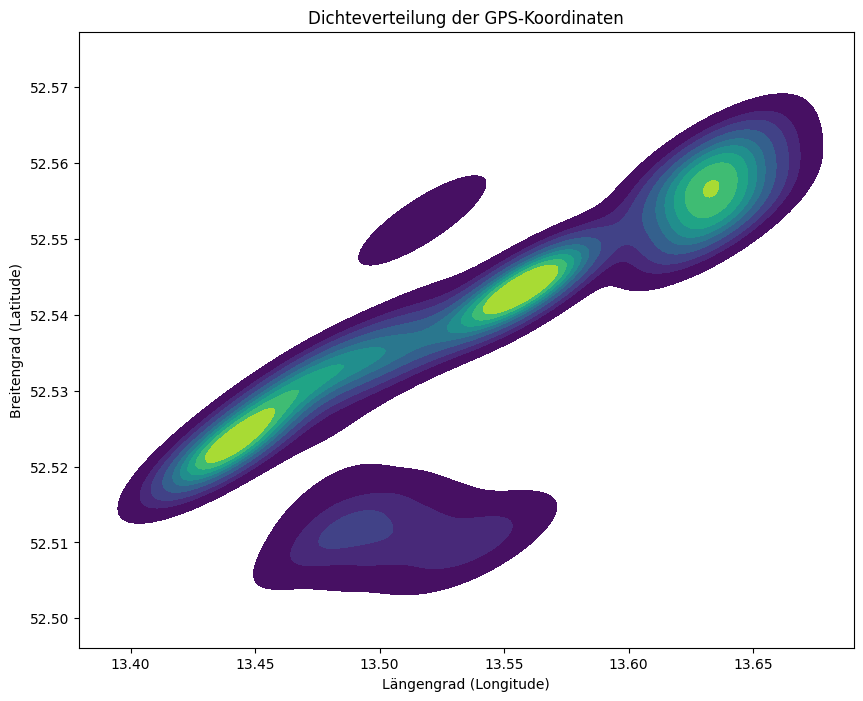

In [111]:
import seaborn as sns

# Heatmap der GPS-Koordinaten
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df_ab['GPS_LONG'], y=df_ab['GPS_LAT'], cmap='viridis', fill=True)
plt.title('Dichteverteilung der GPS-Koordinaten')
plt.xlabel('Längengrad (Longitude)')
plt.ylabel('Breitengrad (Latitude)')
plt.show()

/var/folders/r_/sf64g3216mq8k4tfr1t69nrm0000gn/T/ipykernel_15269/2962766572.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_ab['EPOCH_TIME'] = pd.to_datetime(df_ab['EPOCH_TIME'], unit='ms')


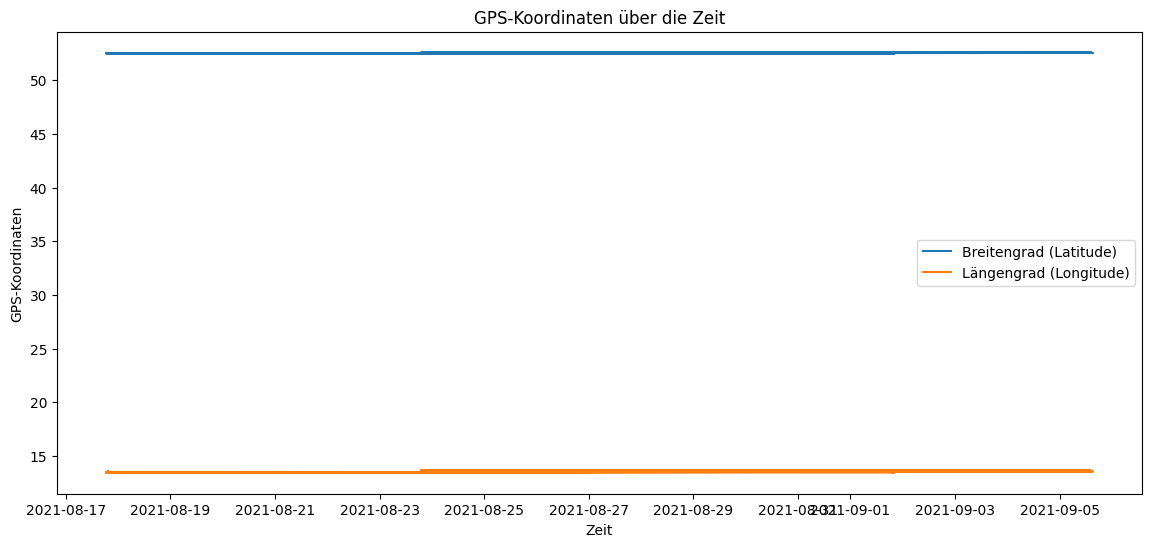

In [112]:
# Konvertieren von EPOCH_TIME zu Datetime
df_ab['EPOCH_TIME'] = pd.to_datetime(df_ab['EPOCH_TIME'], unit='ms')

# Plotten der GPS-Koordinaten über die Zeit
plt.figure(figsize=(14, 6))
plt.plot(df_ab['EPOCH_TIME'], df_ab['GPS_LAT'], label='Breitengrad (Latitude)')
plt.plot(df_ab['EPOCH_TIME'], df_ab['GPS_LONG'], label='Längengrad (Longitude)')
plt.title('GPS-Koordinaten über die Zeit')
plt.xlabel('Zeit')
plt.ylabel('GPS-Koordinaten')
plt.legend()
plt.show()

In [6]:
import pandas as pd
#df_cleaned = df.copy()
df_cleaned.loc[:,'SENSOR_TYPE'] = pd.to_numeric(df_cleaned['SENSOR_TYPE'], errors = 'coerce')

filtered_data = df_cleaned[df_cleaned['SENSOR_TYPE'] == 20]
print(filtered_data.head())

NameError: name 'df_cleaned' is not defined